# Machine Learning Basics - Regression

This notebook provides a practical and theoretical introduction to **Regression analysis**.

**Objectives:**
- Understand the theory behind regression
- Explore different regression techniques
- Apply regression to real data
- Build interactive visualizations and models


## What is Regression?

Regression is a fundamental statistical and machine learning technique used to model and analyze the relationship between a dependent variable (_target_) and one or more independent variables (_features_). It helps us understand how the typical value of the dependent variable changes when any one of the independent variables is varied.

It helps us answer 2 types of questions:

- Explanatory: How does size, location, and age of a house affect its price?
- Predictive: Given the size, location, and age of a house, what is its likely price?

## How it works

Let's use the above example to explain how it works. Our aim is to predict the price of a house based on its size, location, and age. To achieve this with regression, we would typically follow these steps:

- Prepare examples of the thing we want to understand: In the above example, it would be a dataset of houses with their sizes, locations, ages, and prices.
- Using regression algorithms that would
  - Take in the dataset
  - Analyze the relationships between the input variables: size, location, age and what we want to predict: price
  - Create a mathematical model (an equation) that can take in the input variables and come up with an estimation of the price, so that the estimated price is as close as possible to the actual price in the dataset.
- Use the model created in the previous step to predict the price of a new house based on its size, location, and age.


**<span style="color: green;">QUESTION:</span>** The output of regression is a model. How is it useful? And based on that, how is regression important?
<details>
        <summary>Answer: Click to show</summary>

Regression models are useful because they provide a mathematical representation of the relationships between variables, allowing us to make informed predictions and decisions. By understanding how changes in independent variables affect the dependent variable, we can optimize outcomes, allocate resources effectively, and identify key factors driving trends. This makes regression an essential tool in various fields such as finance, healthcare, marketing, and social sciences, where data-driven insights are crucial for strategic planning and problem-solving.

</details>

**<span style="color: green;">QUESTION:</span>** What are some real-world applications of regression?
<details>
        <summary>Answer: Click to show</summary>

- **Finance**: Predicting stock prices, credit scoring, and risk assessment.
- **Healthcare**: Estimating patient outcomes, disease progression, and treatment effectiveness.
- **Marketing**: Analyzing customer behavior, sales forecasting, and market trend analysis.
- **Economics**: Modeling economic indicators, unemployment rates, and inflation trends.
- **Environmental Science**: Predicting climate change impacts, pollution levels, and resource management.

</details>


## Types of Regression

There are several types of regression techniques, each suited for different scenarios:

- **Linear Regression:** Models the relationship between two variables by fitting a straight line. Useful for simple, linear relationships.
- **Multiple Linear Regression:** Extends linear regression to multiple features.
- **Polynomial Regression:** Models non-linear relationships by fitting a polynomial curve.
- **Regularized Regression (Ridge, Lasso):** Adds penalties to prevent overfitting and improve generalization.
- **Logistic Regression:** Used for predicting categories (e.g., success or failure), not continuous values.

In this notebook, we will focus on linear and multiple regression, and demonstrate how to apply them to real data.

# Use Case
As a supermarket manager, you want to understand what are the main drivers for customer purhcases. You know that lower prices will lead to higher quantities purchased for almost all products, but you want to understand all the factors that affect the total sales, before you change your pricing strategy. How can you do that? 


## The Dataset: Supermarket Sales

We will use the [Supermarket Sales dataset](https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales) from Kaggle. This dataset contains sales records for a supermarket, including product, branch, customer, and sales details.

In [1]:
import pandas as pd

dataset_path = "../../data/SuperMarketAnalysis.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Sales,Date,Time,Payment,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,548.9715,01/05/2019,1:08:00 pm,Ewallet,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,80.2200,03/08/2019,10:29:00 am,Cash,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,340.5255,03/03/2019,1:23:00 pm,Credit card,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,489.0480,1/27/2019,8:33:00 pm,Ewallet,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,634.3785,02/08/2019,10:37:00 am,Ewallet,5.3


## Data Dictionary

Let's review the main columns in the dataset:

- **Invoice ID:** Unique identifier for each transaction
- **Branch:** Branch of the supermarket (A, B, or C)
- **City:** City where the branch is located
- **Customer type:** Member or Normal
- **Gender:** Customer gender
- **Product line:** Product category
- **Unit price:** Price per product
- **Sales:** Total sales value including tax
- **Date/Time:** Date and time of purchase
- **Payment:** Payment method
- **Rating:** Customer rating

We will use these features to explore regression techniques.

## Frame the Supermarket Sales Problem as a Regression task
From the above data dictionary, our **dependent variable** (target) will be `Sales`, as we want to increase revenues. While **independent variables** are inputs that help explain or predict the target. These can be:
- Product-related, `Product line`, `Unit price`
- Customer-related, `Gender`, `Customer type`, `City` etc.
- Transaction-related, `Date` ,`Time` etc.

**<span style="color: green;">QUESTION:</span>**  How are these independent variables useful?

<details>
        <summary>Answer: Click to show</summary>

Each independent variable helps explain variation of sales in different ways. For example, `Product line` captures different sales patterns across categories, `City` accounts for regional differences in customer demand, store size, or local economy. `Date` and `Time` capture temporal effects, like sales trends over days or peak shopping hours. Together, these features give the regression model multiple perspectives on _why_ a given transaction's total might be higher or lower.
</details>

**<span style="color: green;">QUESTION:</span>** Why would we want an equation?
<details>
        <summary>Answer: Click to show</summary>

The equation will show the mathematical relationship of the independent variables with respect to the dependent variables. The coefficient will also be useful to determine how much each input influences our target `Sales`.
</details>


## Exploratory Data Analysis (EDA)
Before diving into modeling, it is important to have first a clear understanding of our dataset (data formats, distributions, missing values, etc.). Let's first check its schema and what are the datatypes that it includes.

In [2]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Sales          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [3]:
# Check for distribution of numerical features
df.describe()

,Unit price,Sales,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,322.966749,6.97270
std,26.494628,245.885335,1.71858
min,10.080000,10.678500,4.00000
25%,32.875000,124.422375,5.50000
50%,55.230000,253.848000,7.00000
75%,77.935000,471.350250,8.50000
max,99.960000,1042.650000,10.00000


From a high level perspective, we notice that we have in total 17 columns and 1000 data points. The Y variable (what we have to predict) is the total Sales (`Sales`), i.e. based on the features captured, how much is the total sales going to be like?

Before that though, let's check the distribution of `Total Sales`

Understanding the distribution of the dependent variable is key in the exploratory phase as it helps:

- Decide if transformations are needed for modeling (e.g. as our sales distribution is skewed to the right, we might consider to take the `log(Sales)` so that large transactions would not dominate the fit)
- Guide business insights, for example if we know that people make mostly small purchases, then it would also affect how inventory strategy gets optimized

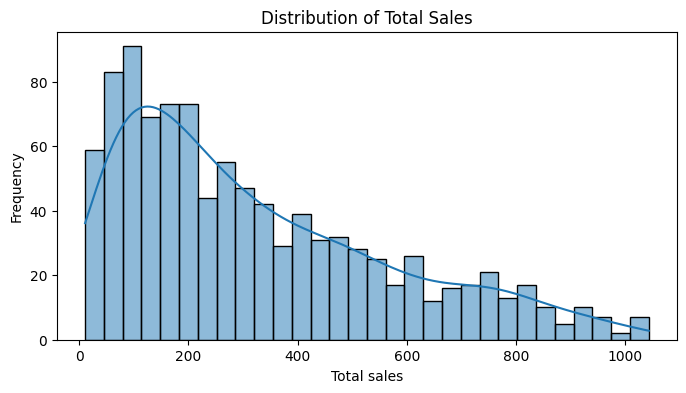

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of Total sales
plt.figure(figsize=(8, 4))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total sales")
plt.ylabel("Frequency")
plt.show()

From this chart we notice the Total distribution of sales. In the x-axis we have the number of total sales, while in the y-axis we have how often these sales have happened.

**<span style="color: green;">QUESTION:</span>** What does this chart tell us?
<details>
        <summary>Answer: Click to show</summary>


- How sales values are spread out (e.g. do most transactions fall in the low-medium range, or are there many high-value purchases?)
- Presence of skewness or outliers (we notice that the distribution is skewed to the right, meaning that majority of the sales were small purchase and very few large)
- Customer puchasing behaviour (the shape can help reveal whether spending habits vary widely).

</details>


And now let's do the same by product line:

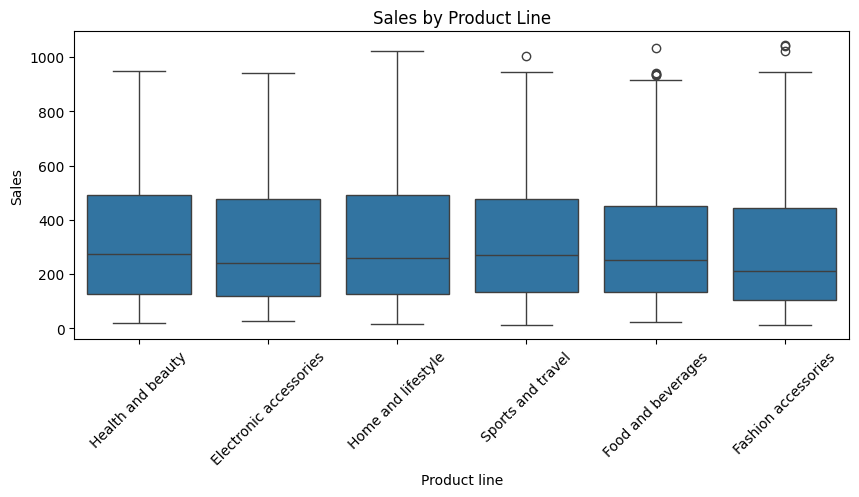

In [5]:
# Visualize sales by product line
plt.figure(figsize=(10, 4))
sns.boxplot(x="Product line", y="Sales", data=df)
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()

**<span style="color: green;">QUESTION:</span>** What do you see?
<details>
        <summary>Answer: Click to show</summary>

We notice that overall they are quite similar with only a couple of outliers in `Sports and travel`, `Foods and beverages`, and `Fashion accessories`. Not only this, but `Fashion accessories` seems to have the least sales in general.

</details>

# Linear Regressions

The equation looks like this:

$$
\text{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \varepsilon\
$$

where:
- 𝑦: Dependent variable (the target we want to predict, e.g., sales).  
- β0: Intercept (baseline value of 𝑦 when all variables are 0).  
- 𝛽1,𝛽2,…,𝛽𝑝: Coefficients (show how much 𝑦 changes when each x increases by 1, holding others constant).  
- x1​,x2​,…,xp: Independent variables (features/variables).  
- ε: Error term (captures noise and variation not explained by the model).  


## Simple Linear Regression

Simple linear regression models the relationship between two variables by fitting a straight line. In business, it can be used to predict sales based on a **single feature**, such as unit price.

**Example use cases:**
- Predicting sales from advertising spend
- Estimating revenue from number of customers

Let's build a simple linear regression model to predict total `Sales` based on `Unit price`.



In [ ]:
# Simple Linear Regression: Predict Total from Unit price
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.graph_objs as go
import ipywidgets as widgets

# Prepare data
X = df[["Unit price"]].values
y = df["Sales"].values

model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)


# Interactive plot
@widgets.interact(
    unit_price=widgets.FloatSlider(
        min=float(df["Unit price"].min()),
        max=float(df["Unit price"].max()),
        step=0.5,
        value=float(df["Unit price"].mean()),
        description="Unit price:",
    )
)
def plot_regression(unit_price):
    # Sort the data for plotting a clean regression line
    sorted_indices = np.argsort(df["Unit price"])
    x_sorted = df["Unit price"].iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    pred = model.predict(np.array([[unit_price]]))[0]
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=df["Unit price"], y=df["Sales"], mode="markers", name="Data")
    )
    fig.add_trace(
        go.Scatter(x=x_sorted, y=y_pred_sorted, mode="lines", name="Regression Line")
    )
    fig.add_trace(
        go.Scatter(
            x=[unit_price],
            y=[pred],
            mode="markers",
            marker=dict(size=12, color="red"),
            name="Prediction",
        )
    )
    fig.update_layout(
        title="Simple Linear Regression: Total vs Unit price",
        xaxis_title="Unit price",
        yaxis_title="Total",
    )
    fig.show()
    print(f"Predicted Total for Unit price {unit_price:.2f}: {pred:.2f}")

interactive(children=(FloatSlider(value=55.67213, description='Unit price:', max=99.96, min=10.08, step=0.5), …

## Multiple Linear Regression

Multiple linear regression models the relationship between a target variable and **two or more** features. This allows us to capture more complex relationships and improve prediction accuracy.

**Business relevance:**
- Predicting sales using multiple factors (e.g., unit price, branch, product line)
- Understanding the impact of different variables on business outcomes

Let's build a multiple regression model to predict total `Sales` using several features.

In [ ]:
# Multiple Linear Regression: Predict Total from multiple features
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features (excluding target and identifiers)
features_to_encode = [
    "Branch",
    "City",
    "Customer type",
    "Gender",
    "Product line",
    "Payment",
]

other_features_to_include = [
    "Unit price",
]

## Feature encoding

Before moving on to the modeling phase, a necessary step is needed: Feature Encoding

In [ ]:
# Encode categorical variables
df_encoded = pd.concat(
    [
        pd.get_dummies(df[features_to_encode], drop_first=True),
        df[other_features_to_include],
    ],
    axis=1,
)



Encoding categorical variables is necessary because regression models require **numerical input**. However, real-world data often include categorical variables (e.g., `Product line`). These must be converted into numerical format because mathematical models cannot understand text or categories natively

There are several types of encoding methods depending on the type and number of categories, some are: 

1) **One hot encoding**
- Creates a new binary column for each category 
- Best for nominal (unordered) categories
    ```
    Color: ["red", "green", "blue"]
    → One-hot encoded:
    Red | Green | Blue
    1  |   0   |  0
    0  |   1   |  0
    0  |   0   |  1
    ```

2) **Categorical encoding**
- Assigns a unique integer to each category.
- Can mislead some models into thinking there's an ordinal relationship.
- Often used for tree-based models, or truly ordinal variables.

    ```
    Color: ["red", "green", "blue"]
    → Categorical encoded: [2, 1, 0]
    ```

3) **Ordinal encoding**
Similar to label encoding but used when categories have a natural order (e.g. small < medium < large)

    ```
    Size: ["small", "medium", "large"]
    → Ordinal encoded: [0, 1, 2]
```

For now, we use one-hot encoding in linear regression when categorical variables are present. Instead of assigning arbitrary numbers (which would wrongly imply an order, and magnitude), one-hot encoding creates binary indicator variables that let the model learn a separate coefficient for each category without introducing false ordinal relationships.

**<span style="color: green;">QUESTION:</span>** Can you guess why this is the case?
<details>
        <summary>Answer: Click to show</summary>

The objective of linear regression is to tell us "If variable X increases (or decreases) by 1 unit, how much does Y increase (or decrease)?".

If we were to use ordinal encoding or categorical encoding, the model might interpret the encoded values as having a meaningful order or distance between them. For example, if we encode the `Branch` variable, we will get Branch A -> 1, Branch B -> 2, Branch C -> 3 the model might incorrectly assume that A is "closer" to B than to C, which doesn't make sense. It also means that if we increase the Branch from A (1) to B (2), the model might think that sales will increase by a certain amount, and then increase again by the same amount when going from B (2) to C (3). This is misleading because the branches are just different locations without any inherent order.

One-hot encoding avoids this issue by creating separate binary variables for each category, allowing the model to learn the effect of each category independently. So it will tell us:

- How much does the Branch being A affect sales?
- How much does the Branch being B affect sales?
- How much does the Branch being C affect sales?

</details>


Before:

In [23]:
df["Branch"].head()

0    Alex
1    Giza
2    Alex
3    Alex
4    Alex
Name: Branch, dtype: object

After one-hot encoding:

In [25]:
df_encoded[["Branch_Cairo", "Branch_Giza"]].astype(int).head()

,Branch_Cairo,Branch_Giza
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


Let's go back to our modeling now!

In [26]:
X = df_encoded
y = df["Sales"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred = model_multi.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 35795.98
R^2 Score: 0.45


- Mean Squared Error (MSE) measures the average of the square of the errors, i.e. how far your model's predictions are from the actual values (the lower the better). In our case, on average our predictions are off by about square root of MSE units (80 units).
- R squared tells you the proportion of variance in the target, i.e. the % of the bariance in the target that is explained by the model (the closer to 1 the better). In our case, our model can explain the data quite well.

In [27]:
# Let's compare performances on training and test sets
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 35424.190368401236
Test MSE: 35795.97937330772


As you can see, our MSE can be improved. Both MSE are high, meaning that our model is most likely _underfitting_ and we should consider more flexible models, such as polynomial features, non-linear models, or improving our features with feature engineering.


**<span style="color: green;">QUESTION:</span>** Since our objective is to create a model that would "fit" the data well, what is underfitting?
<details>
        <summary>Answer: Click to show</summary>

Underfitting happens when a model is too simple to capture the underlying patterns in the data. It fails to learn enough from the training set, leading to high error in both training and test data
</details>


**<span style="color: green;">QUESTION:</span>** Based on the answer above, what is overfitting?
<details>
        <summary>Answer: Click to show</summary>

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations instead of the underlying pattern. This results in excellent performance on the training set but poor generalization to new, unseen data, leading to high error on unseen data.
</details>


## Summary and Next Steps

In this notebook, you have learned:
- The theory and business relevance of regression
- How to apply simple and multiple linear regression
- How to use regularization to improve model performance
- How to interactively explore regression models using real data

**Next steps:**
- Try different features and targets. Feel free to edit the current notebook with additional features and test out how adding more features influences the model prediction!
- Explore non-linear regression and tree-based models (more info in [./05_advanced_regression.ipynb](./05_advanced_regression.ipynb))

For more advanced topics, consider learning about:
- Model evaluation and selection
- Cross-validation
- Feature engineering
- Machine learning pipelines

Thank you for following this regression tutorial!